In [1]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202011/4ti2/16bit


In [2]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [3]:
def make_result_list(mat_path):
    with open(mat_path) as f:
        l_strip = [[s.strip()] for s in f.readlines()]
        result_num = int(l_strip[0][0][:-(2+1)])
        result_list = []
        for i in range(1, result_num+1):
            int_y = [int(l_strip[i][0].split()[j]) for j in range(len(l_strip[i][0].split()))]
            result_list.append(int_y)
    return result_list

In [4]:
df = pd.read_csv('../../input/ost16.csv', sep=',', index_col=0)
mat_path = '16bit.mat.mar'

## 1. 順番にresult_listを一つずつ試していく、毎回ori_yを初期値とする

In [11]:
def calculate_energy(df, y):
    series_y = pd.Series(y)
    E_dot = (sum(y) - sum(df['Y']))**2 
    + (np.dot(series_y, df['SEX']) - np.dot(df['Y'], df['SEX']))**2 
    + (np.dot(series_y, df['AOP']) - np.dot(df['Y'], df['AOP']))**2
    
    E_num = sum([0 if each_y==1 or each_y ==0 else 1 for each_y in y])
    
    return E_dot + E_num

In [251]:
def make_samples1(mat_path, df):
    ori_y = list(df['Y'])
    result_list = make_result_list(mat_path)
    print('len(result_list)=', len(result_list))
    valid_y = [ori_y]
    print('start', ori_y)
    for i, each_list in enumerate(result_list):
        canditate_y = [x + y for (x, y) in zip(ori_y, each_list)]
        while calculate_energy(df, canditate_y)==0 and all(canditate_y != pp for pp in valid_y): 
                valid_y.append(canditate_y)
                print(i, canditate_y,  ' +=', each_list)
                canditate_y = [x + y for (x, y) in zip(canditate_y, each_list)]
            
        else:
            canditate_y = [x - 2*y for (x, y) in zip(canditate_y, each_list)]
            while calculate_energy(df, canditate_y)==0 and all(canditate_y != pp for pp in valid_y):
                    valid_y.append(canditate_y)
                    print(i,  canditate_y,  ' -=', each_list)
                    canditate_y = [x - y for (x, y) in zip(canditate_y, each_list)]
               
            else:
                print('restart:', ori_y)
                continue
                
    print('finish')
        
    return valid_y

In [252]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202011/4ti2/16bit


In [253]:
valid_y = make_samples1(mat_path, df)

len(result_list)= 13
start [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
restart: [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
restart: [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
2 [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]  -= [0, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
restart: [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
3 [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]  -= [0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
restart: [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
4 [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]  -= [0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0]
restart: [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
5 [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1]  -= [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
restart: [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
6 [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1]  -= [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]
restart: [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [254]:
valid_y

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1],
 [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1]]

In [255]:
len(valid_y)

9

## 2. 順番にresult_listを一つずつ試していく, canditate_yは常に初期値ori_yに戻さない

In [266]:
def make_samples2(mat_path, df):
    ori_y = list(df['Y'])
    result_list = make_result_list(mat_path)
    print('len(result_list)=', len(result_list))
    valid_y = [ori_y]
    print('start', ori_y)
    for i, each_list in enumerate(result_list):
        canditate_y = [x + y for (x, y) in zip(valid_y[-1], each_list)]
        while calculate_energy(df, canditate_y)==0 and all(canditate_y != pp for pp in valid_y): 
                valid_y.append(canditate_y)
                print(i, canditate_y,  ' +=', each_list)
                canditate_y = [x + y for (x, y) in zip(valid_y[-1], each_list)]
            
        else:
            canditate_y = [x - y for (x, y) in zip(valid_y[-1], each_list)]
            while calculate_energy(df, canditate_y)==0 and all(canditate_y != pp for pp in valid_y):
                    valid_y.append(canditate_y)
                    print(i,  canditate_y,  ' -=', each_list)
                    canditate_y = [x - y for (x, y) in zip(valid_y[-1], each_list)]
               
            else:
                continue
                
    print('finish')
        
    return valid_y

In [267]:
valid_y = make_samples2(mat_path, df)

len(result_list)= 13
start [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
2 [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]  -= [0, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7 [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1]  -= [0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0]
9 [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1]  += [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0]
11 [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]  -= [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
finish


In [268]:
valid_y

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]]

## 3-0. random0

In [283]:
def random0(mat_path, df, num):
    ori_y = list(df['Y'])
    result_list = make_result_list(mat_path)
    print('len(result_list)=', len(result_list))
    valid_y = [ori_y]
    print('start', ori_y)
    for _ in range(num):
        i = random.randrange(len(result_list))
        #print(_)
        this_time_y = result_list[i]
        canditate_y = [x + y for (x, y) in zip(valid_y[-1], this_time_y)]
        if calculate_energy(df, canditate_y)==0 and all(canditate_y != pp for pp in valid_y): 
                valid_y.append(canditate_y)
                print(i, canditate_y,  ' +=', each_list)
            
        else:
            canditate_y = [x + y for (x, y) in zip(valid_y[-1], this_time_y)]
            if calculate_energy(df, canditate_y)==0 and all(canditate_y != pp for pp in valid_y):
                    valid_y.append(canditate_y)
                    print(i, canditate_y,  ' -=', each_list)

                
    print('finish')
        
    return valid_y

In [284]:
valid_y = random0(mat_path, df, num=100)

len(result_list)= 13
start [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
finish


In [285]:
valid_y

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]]

## 3-1. random
- 良い

In [305]:
def random1(mat_path, df, num):
    ori_y = list(df['Y'])
    result_list = make_result_list(mat_path)
    print('len(result_list)=', len(result_list))
    valid_y = [ori_y]
    print('start', ori_y)
    for _ in range(num):
        i = random.randrange(len(result_list))
        this_time_y = result_list[i]
        canditate_y = [x + y for (x, y) in zip(valid_y[-1], this_time_y)]
        while calculate_energy(df, canditate_y)==0 and all(canditate_y != pp for pp in valid_y): 
                valid_y.append(canditate_y)
                print(i, canditate_y,  ' +=', this_time_y)
                canditate_y = [x + y for (x, y) in zip(valid_y[-1], this_time_y)]
            
        else:
            canditate_y = [x - y for (x, y) in zip(valid_y[-1], this_time_y)]
            while calculate_energy(df, canditate_y)==0 and all(canditate_y != pp for pp in valid_y):
                    valid_y.append(canditate_y)
                    print(i, canditate_y,  ' -=', this_time_y)
                    canditate_y = [x - y for (x, y) in zip(valid_y[-1], this_time_y)]
               
            else:
                print('next')
                continue
                
    print('finish')
        
    return valid_y

In [306]:
valid_y = random1(mat_path, df, num=100)

len(result_list)= 13
start [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
5 [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1]  -= [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
next
8 [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1]  -= [0, 1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
next
5 [1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1]  += [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
next
next
next
11 [0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1]  -= [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
next
next
5 [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1]  -= [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0]
next
next
8 [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]  += [0, 1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0]
next
next
next
1 [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]  += [0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
next
11 [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1]  += [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0]
next
2 [1, 1, 0, 

In [307]:
valid_y

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1],
 [1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1],
 [0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1],
 [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1],
 [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1],
 [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1],
 [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1],
 [1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1],
 [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1],
 [1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1],
 [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
 [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0],
 [1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0],
 [1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
 [1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1],
 [1, 1, 0, 0, 1, 0, 1, 1, 0, 1,

In [308]:
len(valid_y)

36

## 3-2. random2

In [9]:
def make_canditate_y(result_list, canditate_y):
    i = random.randrange(len(result_list))
    this_time_y = result_list[i]
    j = random.randrange(2)
    if j==1:
        canditate_y = [x + y for (x, y) in zip(canditate_y, this_time_y)]
    else:
        canditate_y = [x - y for (x, y) in zip(canditate_y, this_time_y)]
        
    return canditate_y

In [300]:
def random2(matmar_path, df, num):
    ori_y = list(df['Y'])
    valid_y = [ori_y]
    
    result_list = make_result_list(matmar_path)
    
    for _ in range(num):
        canditate_y = make_canditate_y(result_list, valid_y[-1])
        if calculate_energy(df, valid_y[-1])==0 and all(valid_y[-1] != pp for pp in valid_y):
                valid_y.append(canditate_y)
        
    return valid_y

In [302]:
valid_y = random2(mat_path, df, num=100)
valid_y

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]]

In [303]:
valid_y = random2(mat_path, df, num=1000)
valid_y

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]]

## 4. SA

In [310]:
def SA(matmar_path, df, MCMC_steps):
    result_list = make_result_list(matmar_path)
    T_list = [i for i in reversed(range(1, MCMC_steps))]
    E_list = [0]
    valid_y = [list(df['Y'])]
    
    for i in range(len(T_list)):
        canditate_y = make_canditate_y(result_list, valid_y[-1])
        E_canditate = calculate_energy(df, canditate_y) 
        E_list.append(calculate_energy(df, canditate_y)) 
        
        transition_rate = 1
        delta = E_canditate - E_list[-1]
        if  delta > 0:
            transition_rate = math.exp(-1/T_list[i]*delta) 
        R = np.random.uniform(0.0, 1.0)
        
        if R < transition_rate:
            if E_list[-1]==0 and all(canditate_y != pp for pp in valid_y): 
                valid_y.append(canditate_y)
            
    return E_list, valid_y

In [311]:
E_list, valid_y = SA(matmar_path, df, MCMC_steps=100)

In [312]:
valid_y

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1],
 [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1],
 [0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1],
 [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1],
 [0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1],
 [0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1]]

In [313]:
len(valid_y)

18

In [314]:
E_list, valid_y = SA(matmar_path, df, MCMC_steps=1000)

In [315]:
valid_y

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1],
 [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1],
 [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1],
 [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
 [0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
 [0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
 [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
 [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1],
 [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1],
 [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1],
 [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 0,

In [316]:
len(valid_y)

149

In [317]:
E_list, valid_y = SA(matmar_path, df, MCMC_steps=5000)

In [318]:
valid_y

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
 [0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
 [0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1],
 [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1],
 [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
 [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
 [0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1],
 [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1],
 [0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
 [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
 [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1],
 [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1],
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [319]:
len(valid_y)

216

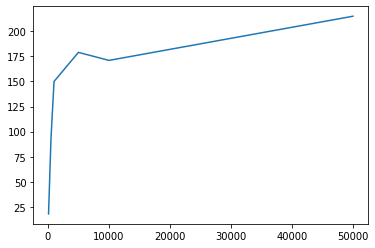

In [322]:
valid_y_len = []
MCMC_steps_list = [100, 500, 1000, 5000, 10000, 50000]
for mcmc in MCMC_steps_list:
    E_list, valid_y = SA(matmar_path, df, MCMC_steps=mcmc)
    valid_y_len.append(len(valid_y))
    
plt.plot(MCMC_steps_list, valid_y_len)

## MCMC⊃ 拡張アンサンブル法

## 5. 焼きなまし法（ST）

In [327]:
def ST(matmar_path, df, max_temp, MC_step1, MC_step2):
    result_list = make_result_list(matmar_path)
    T_list = [i for i in reversed(range(1, max_temp))]
    E_list = [0]
    valid_y = [list(df['Y'])]
    i_list = [0]
    valid_y_num = [1]
    kb =1.38 * 10**-23  # ボルツマン定数 [J/K]
    
    for __ in range(MC_step2):
        #yの更新
        for _ in range(MC_step1):
            canditate_y = make_canditate_y(result_list, valid_y[-1])
            E_canditate = calculate_energy(df, canditate_y)
            E_list.append(E_canditate)
            if E_list[-1]==0 and all(canditate_y != pp for pp in valid_y):
                valid_y.append(canditate_y)
            
        #温度の更新
        i = i_list[-1]
        b_h = 1/(kb*T_list[i -1])
        b_i = 1/(kb*T_list[i])
        b_j = 1/(kb*T_list[i +1])
        transition_rate_h = (b_i - b_h)*E_list[-1]
        transition_rate_j =  (b_i - b_j)*E_list[-1]
        
        if transition_rate_h > transition_rate_j:
            i -= 1
        else:
            i += 1
        i_list.append(i)
        valid_y_num.append(len(valid_y))
            
            
    return E_list, valid_y, i_list, valid_y_num

In [328]:
def Temp_num_plot(max_temp, i_list, valid_y_num, output_path):
    plt.xlabel('temperature')
    plt.ylabel('number of valid y')
    T_list = [i for i in reversed(range(1, max_temp))]
    x = [T_list[i] for i in i_list]
    plt.plot(x, valid_y_num)
    plt.savefig(output_path)
    return plt.show()

In [329]:
E_list, valid_y, i_list, valid_y_num = ST(matmar_path, df, max_temp=100, MC_step1=10, MC_step2=100)

In [331]:
valid_y

[[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1],
 [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
 [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
 [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
 [1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
 [1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1],
 [0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1],
 [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1],
 [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1],
 [0, 1, 1, 0, 0, 0, 1, 0, 0, 1,

In [332]:
len(valid_y)

153

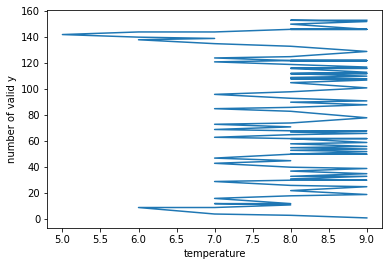

In [330]:
output_path = '../../output/4ti2/markov/markov_basis_maxtemp100_MCstep10_MCstep2100'
Temp_num_plot(max_temp, i_list, valid_y_num, output_path)

In [339]:
MC_step2_list = [1, 10, 100, 1000, 1000, 10000]#1000にしておく
for mc_step2 in MC_step2_list:
    E_list, valid_y, i_list, valid_y_num = ST(matmar_path, df, max_temp=100, MC_step1=10, MC_step2=mc_step2)
    print(len(valid_y))

2
19
122
129
238
125


In [338]:
MC_step1_list = [1, 10, 100, 1000, 1000, 10000]#適当に1000にしておく
for mc_step1 in MC_step1_list:
    E_list, valid_y, i_list, valid_y_num = ST(matmar_path, df, max_temp=100, MC_step1=mc_step1, MC_step2=100)
    print(len(valid_y))

21
163
67
283
148
261


In [341]:
temp_list = [10, 100, 1000, 1000, 10000]#1000にしておく
for temp in temp_list:
    E_list, valid_y, i_list, valid_y_num = ST(matmar_path, df, max_temp=temp, MC_step1=10, MC_step2=100)
    print(len(valid_y))

62
158
156
165
147


In [342]:
E_list, valid_y, i_list, valid_y_num = ST(matmar_path, df, max_temp=1000, MC_step1=1000, MC_step2=1000)

In [343]:
len(valid_y)

192

In [344]:
E_list, valid_y, i_list, valid_y_num = ST(matmar_path, df, max_temp=1000, MC_step1=10000, MC_step2=1000)
len(valid_y)

161

In [345]:
E_list, valid_y, i_list, valid_y_num = ST(matmar_path, df, max_temp=100, MC_step1=1000, MC_step2=100)
print(len(valid_y))

183


## 交換モンテカルロ

In [13]:
def exchange_MonteCarlo(matmar_path, df, temp_num, a, MCMC_steps):
    result_list = make_result_list(matmar_path)
    
    b_temps = [a/i for i in range(1, temp_num)]
    len_temp = temp_num - 1
    replicas = {i:[each_b_temp, list(df['Y'])] for i, each_b_temp in enumerate(b_temps)}
    E_dic = {i:[0] for i in range(len_temp)}#b_temp, y, energy
    valid_y_list = [list(df['Y'])]
    for num in range(MCMC_steps):
        
        for i in range(len_temp):
            replicas[i][1] = make_canditate_y(result_list, replicas[i][1])
            
        m = random.randrange(len_temp)
        n = random.randrange(len_temp)
        
        """transition_p = 1#交換確率 #意味は同じ
        delta = (replicas[m][0] - replicas[n][0])*(calculate_energy(df, replicas[n][1]) - calculate_energy(df, replicas[m][1]))
        if delta > 0:
            transition_p = math.exp(-delta)#詳細釣り合い条件、交換確率"""
        
        delta = (replicas[m][0] - replicas[n][0])*(calculate_energy(df, replicas[m][1]) - calculate_energy(df, replicas[n][1]))
        transition_p = math.exp(delta)
        
        R = np.random.uniform(0.0, 1.0)
        if R <= transition_p:#乱数と交換確率の比較
            y_m = replicas[m][1]
            y_n = replicas[n][1]
            
            replicas[m][1] = y_n
            replicas[n][1] = y_m
        
        for i in range(len_temp):
            this_time_E = calculate_energy(df, replicas[i][1])
            this_time_y = replicas[i][1]
            E_dic[i].append(this_time_E)
            if this_time_E==0 and all(this_time_y != pp for pp in valid_y_list):
                valid_y_list = [this_time_y]
                
    return replicas, E_dic, valid_y_list

In [6]:
def exchange_MonteCarlo_trial(matmar_path, df, temp_num, MCMC_steps):
    a_dic = {}
    for a in range(1, 100):
        replicas, E_dic, valid_y_list = exchange_MonteCarlo(matmar_path, df, temp_num, a, MCMC_steps)
        a_dic[a] = len(valid_y_list)
    return a_dic

In [7]:
def result_plot(E_dic, save_plot): 
    plt.xlabel('steps')
    plt.ylabel('energy')
    x = [i for i in range(len(E_dic[0]))]
    for e in E_dic.values():
        plt.plot(x, e)
    plt.savefig(save_plot)
    return plt.show()

In [15]:
df = pd.read_csv('../../input/ost16.csv', sep=',', index_col=0)
matmar_path = '16bit.mat.mar'
temp_num = 10000
MCMC_steps = 100
exchange_MonteCarlo_trial(matmar_path, df, temp_num, MCMC_steps)

{1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 1,
 60: 1,
 61: 1,
 62: 1,
 63: 1,
 64: 1,
 65: 1,
 66: 1,
 67: 1,
 68: 1,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 74: 1,
 75: 1,
 76: 1,
 77: 1,
 78: 1,
 79: 1,
 80: 1,
 81: 1,
 82: 1,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 90: 1,
 91: 1,
 92: 1,
 93: 1,
 94: 1,
 95: 1,
 96: 1,
 97: 1,
 98: 1,
 99: 1}